In [1]:
import pickle
import numpy as np
import cv2
import matplotlib.pyplot as plt
import torch
import logging

In [3]:
logging.info("hello")

In [4]:
def read_images(path):
    img = cv2.imread(path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    return img

In [5]:
with open('/Users/bhabaranjanpanigrahi/Research/Code/fusion-network/recorded-data/136021.bag/snapshot.pickle', 'rb') as f:
    x = pickle.load(f)

In [4]:
z = x.keys()

In [14]:
y = x[0]

In [15]:
y

{'point_cloud': [],
 'prev_cmd_vel': [(-0.009958509355783463, 0.019072692841291428),
  (-0.015568405389785767, 0.016260044649243355),
  (-0.019129527732729912, 0.003052756655961275),
  (-0.020473819226026535, 0.01298145018517971),
  (-0.01774933747947216, 0.013069096952676773),
  (-0.017733506858348846, -0.003764478489756584),
  (-0.016203882172703743, -0.0017944416031241417),
  (-0.018155932426452637, -0.008849570527672768),
  (-0.023938197642564774, -0.009517926722764969),
  (-0.02776016667485237, -0.02153347246348858),
  (-0.030767031013965607, -0.04889078438282013),
  (-0.03356272354722023, -0.04941470921039581),
  (-0.03428502380847931, -0.06832224875688553),
  (-0.03296400606632233, -0.06975317746400833),
  (-0.02733985334634781, -0.07857964932918549),
  (-0.015332378447055817, -0.09095203131437302),
  (0.0015126541256904602, -0.0689685195684433),
  (0.03002055361866951, -0.039997510612010956),
  (0.055459026247262955, 0.02134573832154274),
  (0.08437824249267578, 0.1358662545680

In [10]:
y['point_cloud'] = []

In [13]:
print(len(y['prev_cmd_vel']))

21


In [55]:
counter = 0 
keep_index = []
for i in list(x.keys()):
    if list(x[i].keys()).count('local_goal') == 0:
        counter += 1
        keep_index.append(i)

In [57]:
print(counter)

18


(78.07461322261523, 98.41742401016712)

In [21]:
img = read_images("/Users/bhabaranjanpanigrahi/Research/Code/fusion-network/recorded-data/136021.bag/0.jpg")

In [24]:
from torchvision import transforms
img = transforms.ToTensor()(img)
img.shape

torch.Size([3, 720, 1280])

In [23]:
# plt.imshow(img)
print(img.shape)

(720, 1280, 3)


In [ ]:
x[12]["point_cloud"]

[[-1.489162802696228, -2.829235792160034, -0.8566910624504089],
 [-6.271306037902832, -11.909701347351074, 0.23494429886341095],
 [-1.7593085765838623, -3.3396506309509277, -0.8714604377746582],
 [-6.347898960113525, -12.044957160949707, 0.713548481464386],
 [-2.137301445007324, -4.055468559265137, -0.8910780549049377],
 [-2.4938340187072754, -4.727977275848389, -0.846623420715332],
 [-10.429786682128906, -19.765125274658203, 2.7440104484558105],
 [-2.8867945671081543, -5.468351364135742, -0.7592461109161377],
 [-10.42435073852539, -19.738130569458008, 3.535419225692749],
 [-3.537585973739624, -6.6982903480529785, -0.6627323031425476],
 [-10.284928321838379, -19.465911865234375, 4.279464244842529],
 [-4.985926151275635, -9.432696342468262, -0.5591574311256409],
 [-10.293978691101074, -19.46658706665039, 5.083893775939941],
 [-6.583104610443115, -12.443825721740723, -0.24572989344596863],
 [-4.5400519371032715, -8.578289031982422, 2.600613832473755],
 [-1.500841736793518, -2.82743263244

In [ ]:
result = []
pts = []
for i  in range(6,10):
    pts = []
    for point in x[i]["point_cloud"]:
        if (point[0]**2 + point[1]**2 + point[2]**2 )< 27:
            pts.append(point)
    result.append(pts)


In [ ]:
print(len(result[0])+len(result[1])+len(result[2])+len(result[3]))

28601


In [ ]:
x = np.concatenate(result)

In [1]:
x[0].keys()

NameError: name 'x' is not defined

In [ ]:
x.shape
x.reshape((-1,1))

array([[ 2.90688777],
       [-1.35426879],
       [-0.85927927],
       ...,
       [ 0.95411652],
       [-3.33618879],
       [-0.42605525]])

In [ ]:
x.shape

(28601, 3)

In [15]:
import torch.nn.functional as F
import torch

In [23]:
# np.indices(self.grid_size) * intervals.reshape(dim_array) + min_bound.reshape(dim_array)
grid_size= np.asarray([4,3,2])
grid_size2= np.asarray([4,3,2])
dim_size = np.ones(4, int)
dim_size[0]=-1

In [24]:
ind1 = np.indices(grid_size)
ind2 = np.indices(grid_size2)

In [26]:
y = F.pad(torch.tensor(ind1), (1,0),'constant',value=1)
z = F.pad(torch.tensor(ind2), (1,0),'constant',value=2)

In [33]:
y.shape

torch.Size([3, 4, 3, 3])

In [34]:
z.shape

torch.Size([3, 4, 3, 3])

In [32]:
s = []
s.append(y)
s.append(z)

In [35]:
l = torch.cat(s, dim=0)

In [36]:
l.shape

torch.Size([6, 4, 3, 3])

In [ ]:
intervals = np.asarray([10,12, 5]).reshape(dim_size)

In [ ]:
voxel_positions = ind * intervals

In [ ]:
print(ind.shape)
print(intervals.shape)
print(voxel_positions.shape)

(3, 4, 3, 2)
(3, 1, 1, 1)
(3, 4, 3, 2)


In [ ]:
voxel_positions

array([[[[ 0,  0],
         [ 0,  0],
         [ 0,  0]],

        [[10, 10],
         [10, 10],
         [10, 10]],

        [[20, 20],
         [20, 20],
         [20, 20]],

        [[30, 30],
         [30, 30],
         [30, 30]]],


       [[[ 0,  0],
         [12, 12],
         [24, 24]],

        [[ 0,  0],
         [12, 12],
         [24, 24]],

        [[ 0,  0],
         [12, 12],
         [24, 24]],

        [[ 0,  0],
         [12, 12],
         [24, 24]]],


       [[[ 0,  5],
         [ 0,  5],
         [ 0,  5]],

        [[ 0,  5],
         [ 0,  5],
         [ 0,  5]],

        [[ 0,  5],
         [ 0,  5],
         [ 0,  5]],

        [[ 0,  5],
         [ 0,  5],
         [ 0,  5]]]])

In [2]:
import pickle
import coloredlogs, logging
import os

from torch.utils.data import Dataset
coloredlogs.install()

class IndexDataset(Dataset):

    def __init__(self, dir_path):        
        self.root_path = dir_path
        self.pickle_path = os.path.join(dir_path , 'snapshot.pickle')        
        
        logging.info('Parsing pickle file...')
    
        with open(self.pickle_path, 'rb') as data:
            self.content = pickle.load(data)

        logging.info('Picklefile loaded')

        # Exclude keys that does not have a local goal [as the robot did not travel 10 meters]
        keys = list(self.content.keys())
        for key in keys:
            if 'local_goal' not in self.content[key].keys():
                self.content.pop(key)

    def __len__(self):
        # Excluding last 2 minutes of recording may not have local_goal
        # Snapshot is taken at 2 frames per second

        return int(len(self.content.keys()) / 4)
    
    def __getitem__(self, offset_index) :
        # We are taking 4 sequential images, point clouds each time to account for temporal variation
        start_index = offset_index * 4
        end_index = start_index + 3

        # Get data from respective index
        prev_cmd_vel = self.content[end_index]['prev_cmd_vel']
        gt_cmd_vel = self.content[end_index]['gt_cmd_vel']
        local_goal = self.content[end_index]['local_goal']
        robot_position = self.content[end_index]['robot_position']
        
        # Image paths
        image_paths = [ os.path.join(self.root_path, str(i)+'.jpg') for i in range(start_index, end_index+1) ]
        
        # only keep points that are under 5 + 1 (delta) meters from the robot
        point_clouds = []
        for point_snapshot in range(start_index, end_index+1):
            filtered_points = []
            for point in self.content[point_snapshot]['point_cloud']:
                if (point[0]**2 + point[1]**2 + point[2]**2) <= 26:
                    filtered_points.append(point)
            point_clouds.append(filtered_points)                


        return (image_paths, point_clouds, local_goal, prev_cmd_vel, robot_position, gt_cmd_vel)

        

object = IndexDataset('/Users/bhabaranjanpanigrahi/Research/Code/fusion-network/recorded-data/136021.bag')
print(object.__len__())

2023-04-29 07:09:48 BhabaranjansMBP root[36127] INFO Parsing pickle file...
2023-04-29 07:09:56 BhabaranjansMBP root[36127] INFO Picklefile loaded


169


In [3]:
l = list(object.content.keys())
missing = []
for i in l:
    if 'local_goal' not in object.content[i].keys():
        missing.append(i)

In [4]:
missing

[]

In [5]:
z = object.__getitem__(44)

In [6]:
len(z[1][3])

14723

In [34]:
import torch
from torchvision import transforms
import pickle
import numpy as np
import coloredlogs, logging
import os
import cv2

from torch.utils.data import Dataset
from scipy.spatial.transform import Rotation as R

coloredlogs.install()

def read_images(path):
    # print(f"{path = }")
    image = cv2.imread(path)
    # Will have to do some re-sizing
    return cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

def get_transformation_matrix(position, quaternion):
    theta = R.from_quat([quaternion.x, quaternion.y, quaternion.z, quaternion.w]).as_euler('XYZ')[2]
    robo_coordinate_in_glob_frame  = np.array([[np.cos(theta), -np.sin(theta), position.x],
                    [np.sin(theta), np.cos(theta), position.y],
                    [0, 0, 1]])
    return robo_coordinate_in_glob_frame

def cart2polar(xyz):
    r = np.sqrt(xyz[:, 0] ** 2 + xyz[:, 1] ** 2)
    theta =  np.arctan2(xyz[:, 1], xyz[:, 0])
    return np.stack((r,theta, xyz[:,2]), axis=1)


class ApplyTransformation(Dataset):
    def __init__(self, input_data, grid_size = [72, 30, 30]):
        self.grid_size = np.asarray(grid_size)  
        self.input_data = input_data    
        self.image_transforms = transforms.Compose([
                    transforms.ToTensor(),
                    transforms.Resize((224,224),antialias=True),
                    # transforms.Normalize(mean=[0.485, 0.456, 0.406],  # ImageNet mean hardcoded
                    #                       std=[0.229, 0.224, 0.225])  # ImageNet std hardcoded
            ])
    
    def __len__(self):
         # TODO: this will return 1 example set with the following details
        return len(self.input_data)

    def __getitem__(self, index):
        # Transform images
        self.image_paths = self.input_data[index][0]
        self.point_clouds = self.input_data[index][1]
        self.local_goal = self.input_data[index][2]
        self.prev_cmd_vel = self.input_data[index][3]        
        self.robot_position  = self.input_data[index][4]
        self.gt_cmd_vel = self.input_data[index][5]
        

        images = [ self.image_transforms(read_images(path)) for path in self.image_paths]
        stacked_images = torch.cat(images, dim=0)
        
        # Transform local goal into robot frame
        robot_coordinate_in_glob_frame = get_transformation_matrix(self.robot_position[0],self.robot_position[1])
        transform_to_robot_coordinate =   np.linalg.pinv(robot_coordinate_in_glob_frame)

        local_goal_in_robot_frame = transform_to_robot_coordinate @ np.asanyarray([self.local_goal[0], self.local_goal[1],1]).reshape((3,1))	
        local_goal = (local_goal_in_robot_frame[0,0], local_goal_in_robot_frame[1,0])

        # Transform point-clouds to 3D-Cylider co-ordinate system
        point_clouds = np.concatenate(self.point_clouds)

        # TODO: subsample the point clouds to keep a fixed number of points across frames
        xyz_polar = cart2polar(point_clouds)

        max_bound_r = np.percentile(xyz_polar[:, 0], 100, axis=0)
        min_bound_r = np.percentile(xyz_polar[:, 0], 0, axis=0)

        max_bound = np.max(xyz_polar[:, 1:], axis=0)
        min_bound = np.min(xyz_polar[:, 1:], axis=0)

        max_bound = np.concatenate(([max_bound_r],max_bound))
        min_bound = np.concatenate(([min_bound_r], min_bound))

        range_to_crop = max_bound - min_bound
        cur_grid_size = (self.grid_size - 1)
        intervals = range_to_crop / cur_grid_size

        if (intervals == 0).any(): print("Zero interval!")
        grid_index = (np.floor(( np.clip(xyz_polar, min_bound, max_bound) - min_bound) / intervals)).astype(int)
        
        # Center data around each voxel for PTnet
        voxel_centers = (grid_index.astype(np.float32) + 0.5) * intervals + min_bound
        return_xyz = xyz_polar - voxel_centers
        transformed_pcl = np.concatenate((return_xyz, xyz_polar, point_clouds[:, :2]), axis=1)

         

        local_goal = torch.tensor(local_goal, dtype=torch.float32).ravel()
        local_goal = (local_goal - local_goal.min()) / (local_goal.max() - local_goal.min())

        prev_cmd_vel = torch.tensor(self.prev_cmd_vel, dtype=torch.float32).ravel()
        gt_cmd_vel = torch.tensor(self.gt_cmd_vel, dtype=torch.float32).ravel()


        return (stacked_images, torch.tesor(grid_index), torch.Tensor(transformed_pcl), local_goal, prev_cmd_vel, gt_cmd_vel)






In [35]:
ob2 = ApplyTransformation(object,[21,110,10])
# len(z)

x = ob2.__getitem__(0)

In [37]:
x[1][1].shape

(29269, 8)

In [38]:
y = x[1][1]
c = []
c.append(y)
c.append(y)
c.append(y)
d = torch.tensor(c)

In [39]:
d.shape

torch.Size([3, 29269, 8])

In [40]:
x = [torch.from_numpy(i) for i in c]

In [52]:
l = x[0]

In [56]:
l.shape

torch.Size([29269, 8])

In [51]:
import torch.nn.functional as F
d = np.ones((100,8))


In [57]:

k = F.pad(l, (1, 0), 'constant', value=7)

In [60]:
k[0]

tensor([ 7.0000e+00,  9.1713e-03,  8.8107e-03, -3.8865e-03,  3.0948e+00,
        -1.7204e+00, -8.2926e-01, -4.6118e-01, -3.0603e+00],
       dtype=torch.float64)

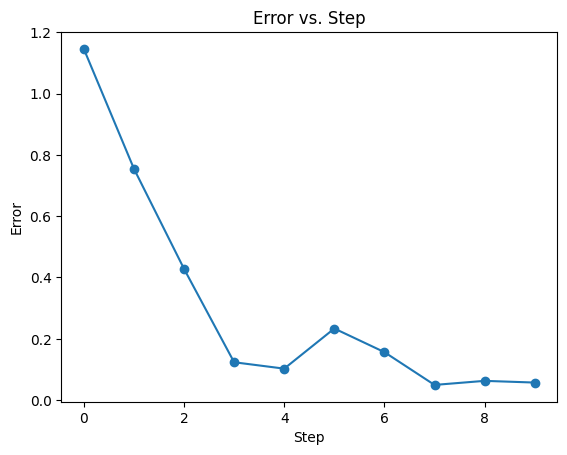

In [14]:
import matplotlib.pyplot as plt

# Create x and y data
x = [i for i in range(10)]
y = [1.1454883813858032, 0.7548354268074036, 0.42827606201171875, 0.12355022132396698, 0.10271172225475311, 0.23359526693820953, 0.15651413798332214, 0.049618806689977646, 0.06286948174238205, 0.057311490178108215]

# Plot the graph
plt.plot(x, y, '-o')
plt.xlabel('Step')
plt.ylabel('Error')
plt.title('Error vs. Step')
plt.show()